### ESMA 4016
### Clasificacion usando k-nn
#### Edgar Acuna 

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

#### Ejemplo1. Leyendo los datos de las notas en un curso, usando como predictoras E1 y E2

In [58]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")

In [59]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()

In [60]:
#Haciendo el knn con tres vecinos y calculando el porcentaje de precision
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X1, y1) 
neigh.score(X1, y1)

1.0

In [61]:
#Calculando las predicciones
pred=neigh.predict(X1)
print(classification_report(y1, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00        32



In [62]:
#Calculando los errores
error=(y1!=pred).sum()
print "Este es el numero de errores=", error

Este es el numero de errores= 0


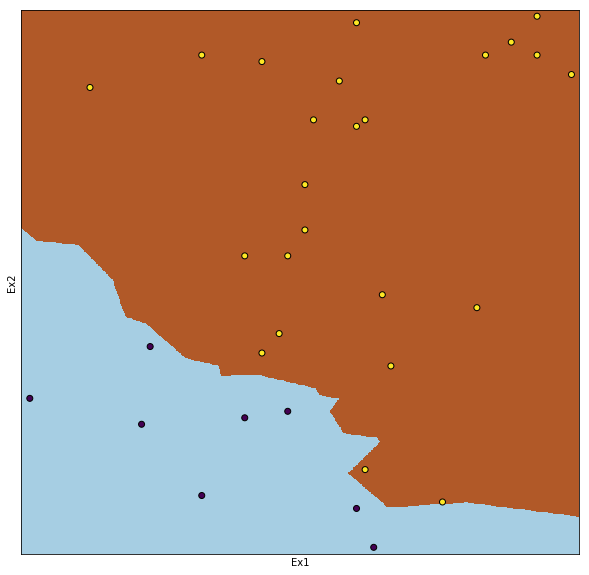

In [63]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=neigh.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Ejemplo 2. K-nn aplicado a Diabetes

In [64]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [65]:
y=data['class']
X=data.iloc[:,0:8]
y1=y.as_matrix()
X1=X.as_matrix()

In [66]:
#Estimacion de la precision con k=3 vecinos  por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.4, random_state=0)
X_train, y_train

X_test, y_test

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [72]:
pred=neigh.predict(X_test)
(pred==1).sum()

221

In [73]:
(pred==2).sum()

87

In [74]:
neigh.score(X_test, y_test)

0.70779220779220775

In [75]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.76      0.82      0.79       205
          2       0.57      0.49      0.53       103

avg / total       0.70      0.71      0.70       308



La precision es la razon  tp / (tp + fp) donde tp=168 is el numero de true positivos y fp=53 es el numero de falsos positivos.

la precision mide la abilidad del clasificador de no etiquetar como positivo una muestra que es negativa.


El recall es la razon tp / (tp + fn) donde tp is el numero de true positivos y fp=37 es el numero de falsos negativos

El recall mide la capacidad del clasificador de encontarar todas las muestras positivas

El f1-score ces la media armonica de la precision y el recall



In [76]:
#Estimacion de la precision usando k=5 vecinos usando validacion cruzada
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(neigh, X1, y1, cv=10)
scores

array([ 0.67532468,  0.79220779,  0.71428571,  0.67532468,  0.66233766,
        0.74025974,  0.7012987 ,  0.79220779,  0.71052632,  0.75      ])

In [77]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.09)


In [78]:
from sklearn import metrics
scores = cross_val_score(neigh, X1, y1, cv=10)
print 'La precison con k=3 vecinos', scores.mean()     

La precison con k=3 vecinos 0.721377306904
